In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from collections import defaultdict

# Load your dataset
df = pd.read_csv("data_Enhanced_Imputed.csv")  # adjust this path if needed

# Set up features and target
X = df.drop(columns=['SubjectID', 'Label_Min', 'Label_Max'])  # drop ID and target columns
y = df['Label_Min']  # use Label_Min as target (1–4)

# Initialize 10-fold stratified cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
])

# Store results
all_true = []
all_pred = []
fold_details = []

# Run CV
for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, output_dict=True, zero_division=0)['weighted avg']['f1-score']
    mae = np.mean(np.abs(y_test - y_pred))
    
    all_true.extend(y_test)
    all_pred.extend(y_pred)
    fold_details.append((fold_idx, acc, mae, f1))




/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

In [58]:
# Print per-fold results
for fold_id, acc, mae, f1 in fold_details:
    print(f"Fold {fold_id}: Accuracy = {acc:.3f}, MAE = {mae:.3f}, F1-Score = {f1:.3f}")

# Average results
avg_acc = np.mean([x[1] for x in fold_details])
avg_mae = np.mean([x[2] for x in fold_details])
avg_f1 = np.mean([x[3] for x in fold_details])

print("\n---- 10 Fold Avg Results ----")
print(f"Accuracy: {avg_acc:.3f}")
print(f"MAE: {avg_mae:.3f}")
print(f"F1-score: {avg_f1:.3f}")

# Print results
print(f"\nAverage Accuracy: {avg_accuracy:.4f}")
print("\nAverage F1 Scores:")
for k, v in avg_f1_scores.items():
    print(f"  {k}: {v:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nFull Classification Report:\n")
print(final_report)

Fold 1: Accuracy = 0.567, MAE = 0.633, F1-Score = 0.534
Fold 2: Accuracy = 0.600, MAE = 0.500, F1-Score = 0.613
Fold 3: Accuracy = 0.533, MAE = 0.700, F1-Score = 0.463
Fold 4: Accuracy = 0.600, MAE = 0.667, F1-Score = 0.564
Fold 5: Accuracy = 0.633, MAE = 0.633, F1-Score = 0.548
Fold 6: Accuracy = 0.467, MAE = 0.900, F1-Score = 0.418
Fold 7: Accuracy = 0.552, MAE = 0.724, F1-Score = 0.497
Fold 8: Accuracy = 0.517, MAE = 0.759, F1-Score = 0.495
Fold 9: Accuracy = 0.448, MAE = 1.000, F1-Score = 0.442
Fold 10: Accuracy = 0.448, MAE = 0.862, F1-Score = 0.431

---- 10 Fold Avg Results ----
Accuracy: 0.537
MAE: 0.738
F1-score: 0.500

Average Accuracy: 0.5366

Average F1 Scores:
  f1_class_1: 0.3167
  f1_class_2: 0.6210
  f1_class_3: 0.1626
  f1_class_4: 0.5348

Confusion Matrix:
[[ 4  2  1  5]
 [ 1 98 11 26]
 [ 0 37  7  8]
 [ 1 42  3 50]]

Full Classification Report:

              precision    recall  f1-score   support

           1       0.67      0.33      0.44        12
           2    

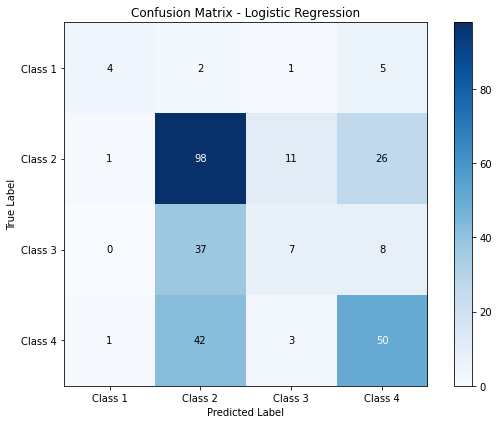

In [59]:

labels = ["Class 1", "Class 2", "Class 3", "Class 4"]

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

thresh = conf_matrix.max() / 2
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()